<a href="https://colab.research.google.com/github/VAEH/fundamentos_datos/blob/main/Proyecto_Fundamentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [345]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [346]:
# Lectura
df_rend = pd.read_csv('https://raw.githubusercontent.com/n-ramirez1/Espec_AyCD_UdeA/main/01_Fundamentos_Prog/03_Proyecto_Final/student-por.csv')
df_rend.sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
561,MS,M,18,U,LE3,T,1,1,at_home,at_home,...,4,3,3,1,4,5,6,10,9,10
595,MS,M,18,U,LE3,T,4,4,services,other,...,5,4,5,1,1,5,3,17,17,17
440,MS,M,16,U,GT3,T,1,1,at_home,services,...,5,4,5,4,5,3,0,7,0,0
264,GP,F,17,U,LE3,A,2,2,other,other,...,3,1,2,1,1,1,8,11,9,10
558,MS,M,17,R,GT3,T,2,2,other,other,...,5,5,5,3,5,5,0,8,13,10


In [347]:
df_rend.shape

(649, 33)

In [348]:
df_rend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [349]:
df_rend.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [350]:
df_rend.corr()

<ipython-input-350-7402ee6dc69d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_rend.corr()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.107832,-0.121050,0.034490,-0.008415,0.319968,-0.020559,-0.004910,0.112805,0.134768,0.086357,-0.008750,0.149998,-0.174322,-0.107119,-0.106505
Medu,-0.107832,1.000000,0.647477,-0.265079,0.097006,-0.172210,0.024421,-0.019686,0.009536,-0.007018,-0.019766,0.004614,-0.008577,0.260472,0.264035,0.240151
Fedu,-0.121050,0.647477,1.000000,-0.208288,0.050400,-0.165915,0.020256,0.006841,0.027690,0.000061,0.038445,0.044910,0.029859,0.217501,0.225139,0.211800
traveltime,0.034490,-0.265079,-0.208288,1.000000,-0.063154,0.097730,-0.009521,0.000937,0.057454,0.092824,0.057007,-0.048261,-0.008149,-0.154120,-0.154489,-0.127173
studytime,-0.008415,0.097006,0.050400,-0.063154,1.000000,-0.147441,-0.004127,-0.068829,-0.075442,-0.137585,-0.214925,-0.056433,-0.118389,0.260875,0.240498,0.249789
failures,0.319968,-0.172210,-0.165915,0.097730,-0.147441,1.000000,-0.062645,0.108995,0.045078,0.105949,0.082266,0.035588,0.122779,-0.384210,-0.385782,-0.393316
famrel,-0.020559,0.024421,0.020256,-0.009521,-0.004127,-0.062645,1.000000,0.129216,0.089707,-0.075767,-0.093511,0.109559,-0.089534,0.048795,0.089588,0.063361
freetime,-0.004910,-0.019686,0.006841,0.000937,-0.068829,0.108995,0.129216,1.000000,0.346352,0.109904,0.120244,0.084526,-0.018716,-0.094497,-0.106678,-0.122705
goout,0.112805,0.009536,0.027690,0.057454,-0.075442,0.045078,0.089707,0.346352,1.000000,0.245126,0.388680,-0.015741,0.085374,-0.074053,-0.079469,-0.087641
Dalc,0.134768,-0.007018,0.000061,0.092824,-0.137585,0.105949,-0.075767,0.109904,0.245126,1.000000,0.616561,0.059067,0.172952,-0.195171,-0.189480,-0.204719


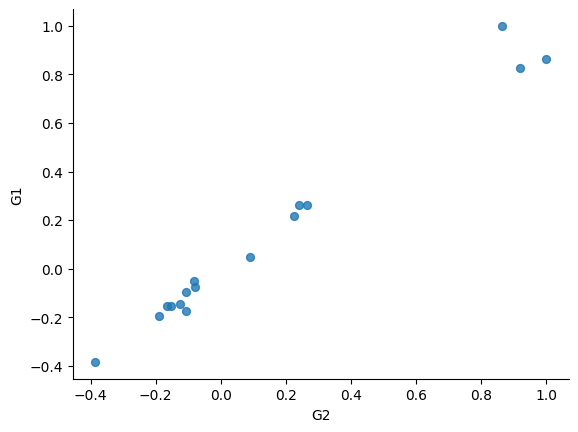

In [351]:
from matplotlib import pyplot as plt
_df_37.plot(kind='scatter', x='G2', y='G1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Text(0.5, 1.0, 'Correlation Heatmap')

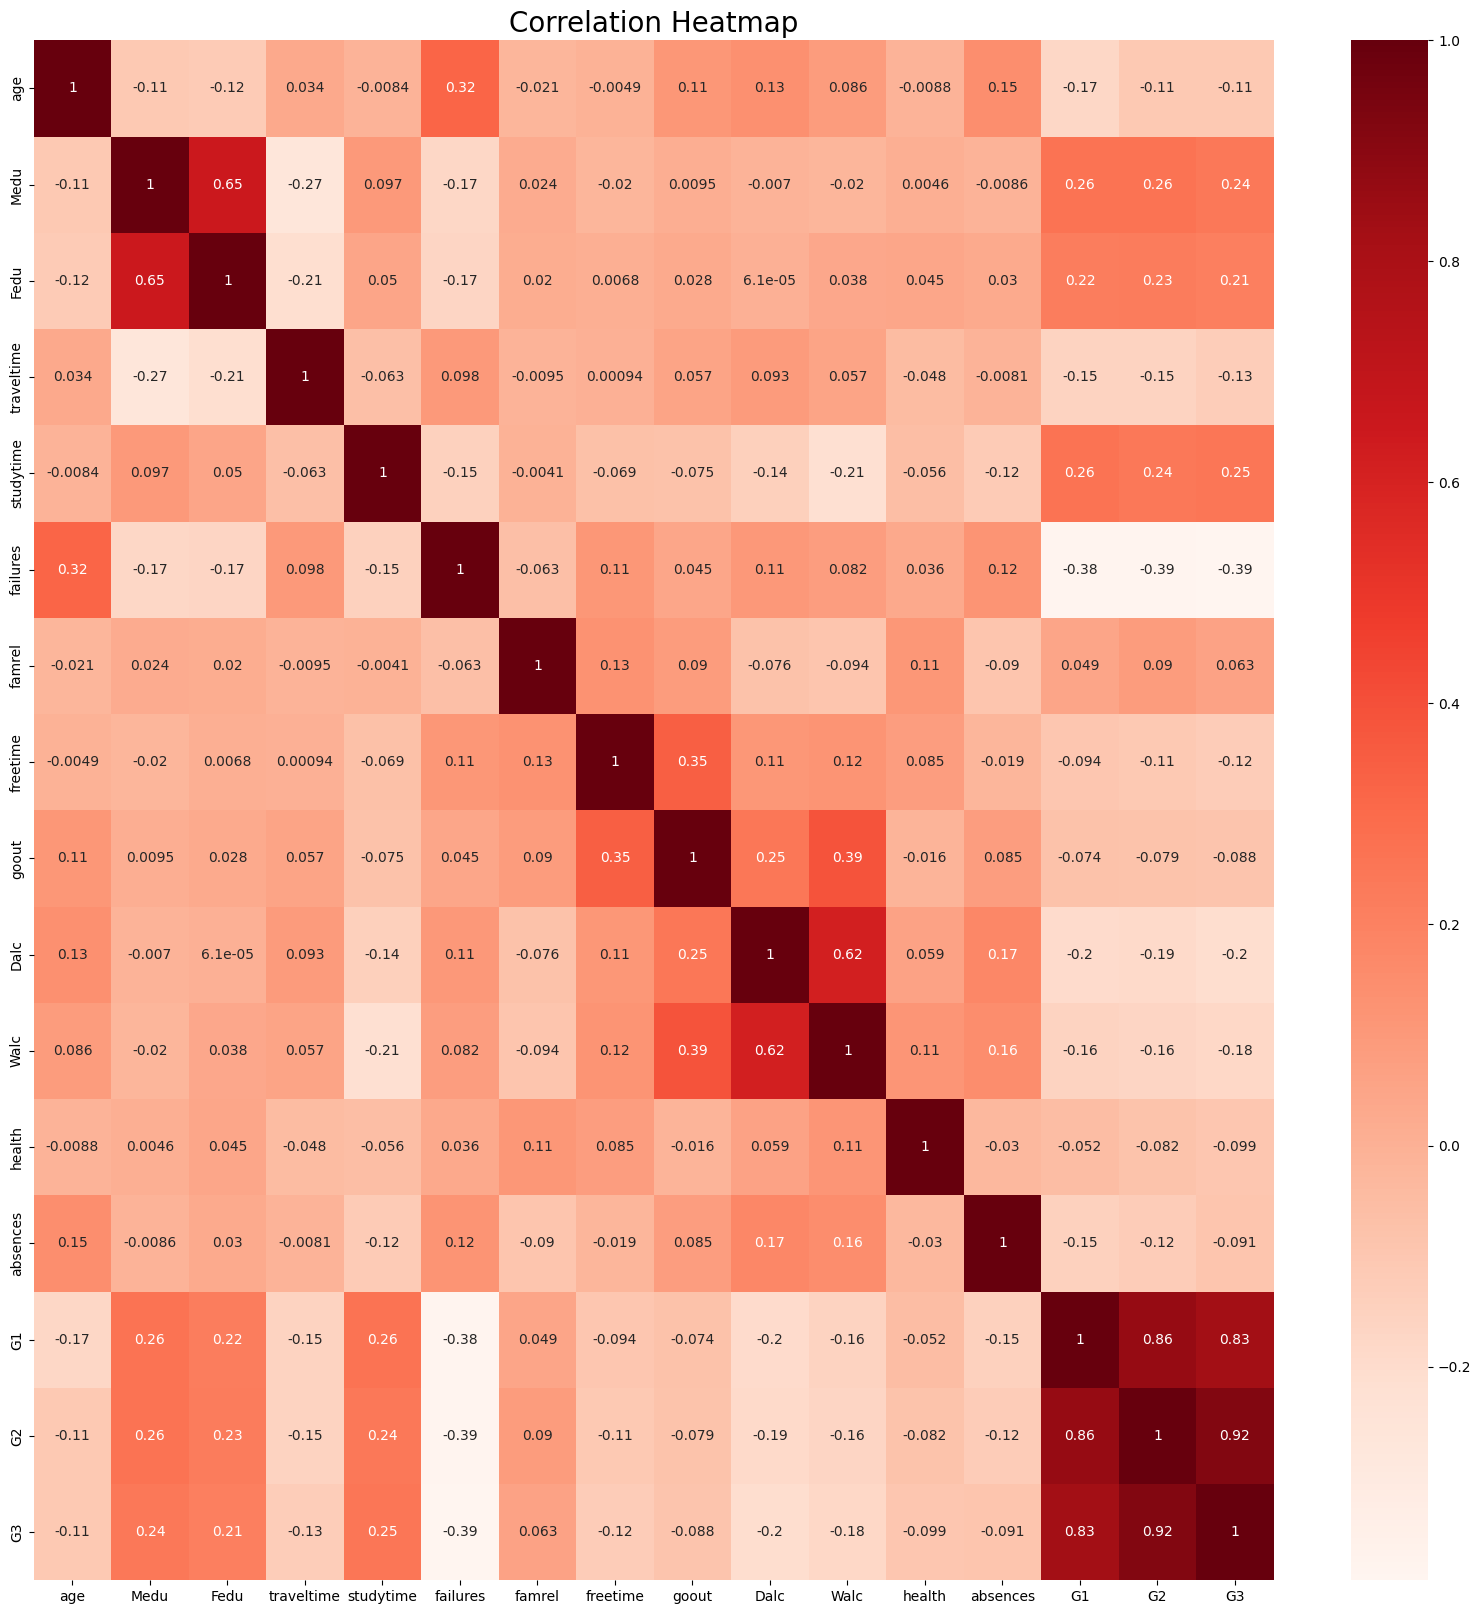

In [352]:
corr=df_rend.corr(numeric_only=True)

plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

In [353]:
df_rend.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [354]:
cat_columns = ["school","sex","address","famsize","Medu","Fedu","Pstatus","Mjob","Fjob","reason","guardian",'traveltime', 'studytime', 'failures' ,'schoolsup', 'famsup','paid' ,'activities', 'nursery', 'higher', 'internet', 'romantic']
len(cat_columns)

22

In [355]:
numeric_columns = list(set(df_rend.columns) - set(cat_columns))

In [356]:
numeric_columns

['Dalc',
 'absences',
 'G2',
 'freetime',
 'G3',
 'famrel',
 'age',
 'health',
 'G1',
 'Walc',
 'goout']

In [357]:
df_rend['Mjob'].unique()

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

In [358]:
df_rend['Fjob'].unique()

array(['teacher', 'other', 'services', 'health', 'at_home'], dtype=object)

In [359]:
df_rend['schoolsup'].unique()

array(['yes', 'no'], dtype=object)

In [360]:
df_rend['G1'].unique()

array([ 0,  9, 12, 14, 11, 13, 10, 15, 17,  8, 16, 18,  7,  6,  5,  4, 19])

In [361]:
bins = [0, 10, 12, 14, 16, 20]  # Límites de los intervalos
labels = ['Fail', 'Suficiente', 'Satisfactorio', 'Bueno', 'Excelente']  # Etiquetas correspondientes a los intervalos


In [362]:
# Utilizar pd.cut() para asignar etiquetas automáticamente
categorias1 = pd.cut(df_rend['G1'], bins=bins, labels=labels, right=False)
categorias2 = pd.cut(df_rend['G2'], bins=bins, labels=labels, right=False)
# Crear un DataFrame con los datos originales y las etiquetas asignadas

In [363]:
df_rend['G1Cat']= categorias1
df_rend['G2Cat']= categorias2

In [364]:
df_rend.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,G1Cat,G2Cat
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,4,0,11,11,Fail,Suficiente
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,2,9,11,11,Fail,Suficiente
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,6,12,13,12,Satisfactorio,Satisfactorio
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,0,14,14,14,Bueno,Bueno
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,0,11,13,13,Suficiente,Satisfactorio


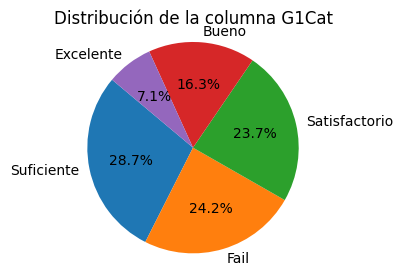

In [365]:
plt.figure(figsize=(3, 3))
conteo = df_rend['G1Cat'].value_counts()
plt.pie(conteo, labels=conteo.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribución de la columna G1Cat')
plt.show()

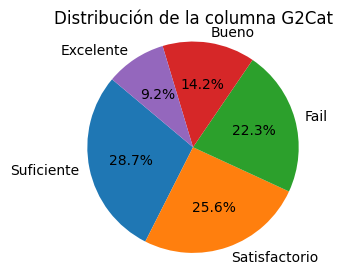

In [366]:
plt.figure(figsize=(3, 3))
conteo = df_rend['G2Cat'].value_counts()
plt.pie(conteo, labels=conteo.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribución de la columna G2Cat')
plt.show()

In [367]:
# Agregar comparación entre periodo 1 y 2

Regresión Lineal

In [368]:
df_rend=df_rend[['absences','failures','G1','G2','G3','health','studytime']]
df_rend.head(3)

,absences,failures,G1,G2,G3,health,studytime
0,4,0,0,11,11,3,2
1,2,0,9,11,11,3,2
2,6,0,12,13,12,3,2


In [369]:
predict='G3'
x=np.array(df_rend.drop(['G3'], axis=1))
y=np.array(df_rend[predict])

In [370]:
df_rend.head()

,absences,failures,G1,G2,G3,health,studytime
0,4,0,0,11,11,3,2
1,2,0,9,11,11,3,2
2,6,0,12,13,12,3,2
3,0,0,14,14,14,5,3
4,0,0,11,13,13,5,2


In [371]:
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size=0.20)

In [372]:
linear=LinearRegression().fit(x_train, y_train)  #Fit our model on x_train & y_train
accuracy=linear.score(x_test,y_test)
print(accuracy)

0.874981126358313


In [373]:
predictions=linear.predict(x_test)   #Call the predict function on x_test

# predictions.size

for i in range(len(predictions)):
    print (round(predictions[i]),x_test[i],y_test[i])

11 [ 5  0  9 11  1  1] 11
11 [ 8  0 10 11  4  2] 12
12 [ 1  0 13 12  4  1] 13
10 [ 4  0  0 11  3  2] 11
12 [ 0  0 13 12  2  1] 14
13 [ 0  0 12 13  2  2] 14
10 [ 4  1 11 10  5  2] 11
12 [ 6  0 11 12  5  2] 9
16 [ 2  0 16 16  4  2] 16
15 [ 6  0 16 14  5  2] 14
13 [ 4  0 13 13  5  3] 13
7 [4 1 6 7 2 1] 8
19 [ 0  0 18 18  2  3] 18
16 [ 0  0 16 16  4  3] 16
16 [ 2  0 15 15  1  2] 15
13 [ 2  0 12 13  5  1] 12
10 [16  0 11  9  1  2] 10
10 [ 8  1 11  9  1  1] 10
14 [ 0  0 14 14  1  2] 14
10 [16  0  9  9  5  1] 8
9 [ 0  1 10  9  5  1] 9
8 [ 0  1 10  8  4  3] 8
9 [5 0 9 9 5 1] 10
13 [ 0  0 13 13  3  2] 14
11 [18  1 10 10  3  2] 10
8 [2 3 8 8 5 1] 7
14 [ 0  0 14 14  4  3] 14
15 [ 0  0 13 15  5  2] 16
1 [0 1 7 0 5 1] 0
11 [ 4  0 11 10  3  2] 11
13 [ 0  0 12 13  4  3] 14
15 [ 2  0 12 15  4  3] 15
11 [ 2  0 10 11  2  4] 12
12 [ 8  0 11 12  3  2] 14
13 [ 4  0 12 12  3  4] 12
15 [ 0  2 14 15  5  1] 15
17 [10  0 16 16  2  4] 16
11 [ 0  0 13 10  1  4] 13
12 [ 0  0 12 12  5  2] 12
8 [12  3  7  8  1  1] 5

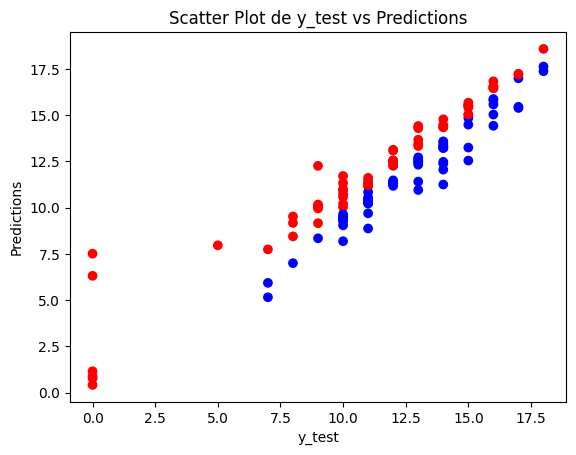

In [374]:
colores = ['blue' if y > p else 'red' for y, p in zip(y_test, predictions)]

# Graficar el diagrama de dispersión con colores diferentes para cada punto
plt.scatter(y_test, predictions, c=colores)
plt.xlabel('y_test')
plt.ylabel('Predictions')
plt.title('Scatter Plot de y_test vs Predictions')
plt.show()

In [375]:
fig, ax = plt.subplots(nrows=len(col_cat), ncols=1,
                       figsize=(8,30), constrained_layout = True)

for i, col in enumerate(col_cat):
  sns.countplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)

NameError: name 'col_cat' is not defined

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, c=['blue', 'red'])
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Línea de 45 grados para comparación
# plt.xlabel('Valores reales')
# plt.ylabel('Predicciones')
plt.title('Valores reales vs Predicciones')
plt.show()